Nous allons essayer, dans le cadre de ce notebook, de prendre en main un jeu de données réel depuis l'import automatisé des fichers jusqu'à la préparation en vue d'alimenter un algorithme de _ML_.

Le _dataset_ présente les résultats  d'une enquête soumise aux employés en juin 2015 par le service RH pour avoir un retour concernant leur qualité de vie au travail.. Il compte des variables telles que la EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance. 

#### importation des bibliothèques

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import tarfile
import os



In [3]:
# Charger le dataset
employees= pd.read_csv('Data/employee_survey_data.csv')


# Afficher les premières lignes du dataset
employees.head()

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,1,3.0,4.0,2.0
1,2,3.0,2.0,4.0
2,3,2.0,2.0,1.0
3,4,4.0,4.0,3.0
4,5,4.0,1.0,3.0


In [4]:
#Display basic information
employees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4410 non-null   int64  
 1   EnvironmentSatisfaction  4385 non-null   float64
 2   JobSatisfaction          4390 non-null   float64
 3   WorkLifeBalance          4372 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 137.9 KB


Le fichier est bien chargé sous forme de DataFrame pandas.
Le dataset contient :

4410 employés

Index automatique allant de 0 à 4409



**variable EnvironmentSatisfaction**

4385 valeurs non nulles

Donc 25 valeurs manquantes

Type : float64

- Niveau de satisfaction vis-à-vis de l’environnement de travail
(valeurs attendues : 1 à 4)

- Le type float64 indique :

-présence de valeurs manquantes (NaN)

-pandas convertit automatiquement en float quand il y a des NaN

Synthèse des valeurs manquantes 
| Variable                | Valeurs manquantes |
| ----------------------- | ------------------ |
| EnvironmentSatisfaction | 25                 |
| JobSatisfaction         | 20                 |
| WorkLifeBalance         | 38                 |


In [5]:
# Display summary statistics
employees.describe()

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
count,4410.000000,4385.000000,4390.000000,4372.000000
mean,2205.500000,2.723603,2.728246,2.761436
std,1273.201673,1.092756,1.101253,0.706245
min,1.000000,1.000000,1.000000,1.000000
25%,1103.250000,2.000000,2.000000,2.000000
50%,2205.500000,3.000000,3.000000,3.000000
75%,3307.750000,4.000000,4.000000,3.000000
max,4410.000000,4.000000,4.000000,4.000000


on remarque qu'il y'a des valeurs manquantes dans les colonnes "EnvironnementSatisfaction","Jobsatisfaction" et "worklifeBalance"

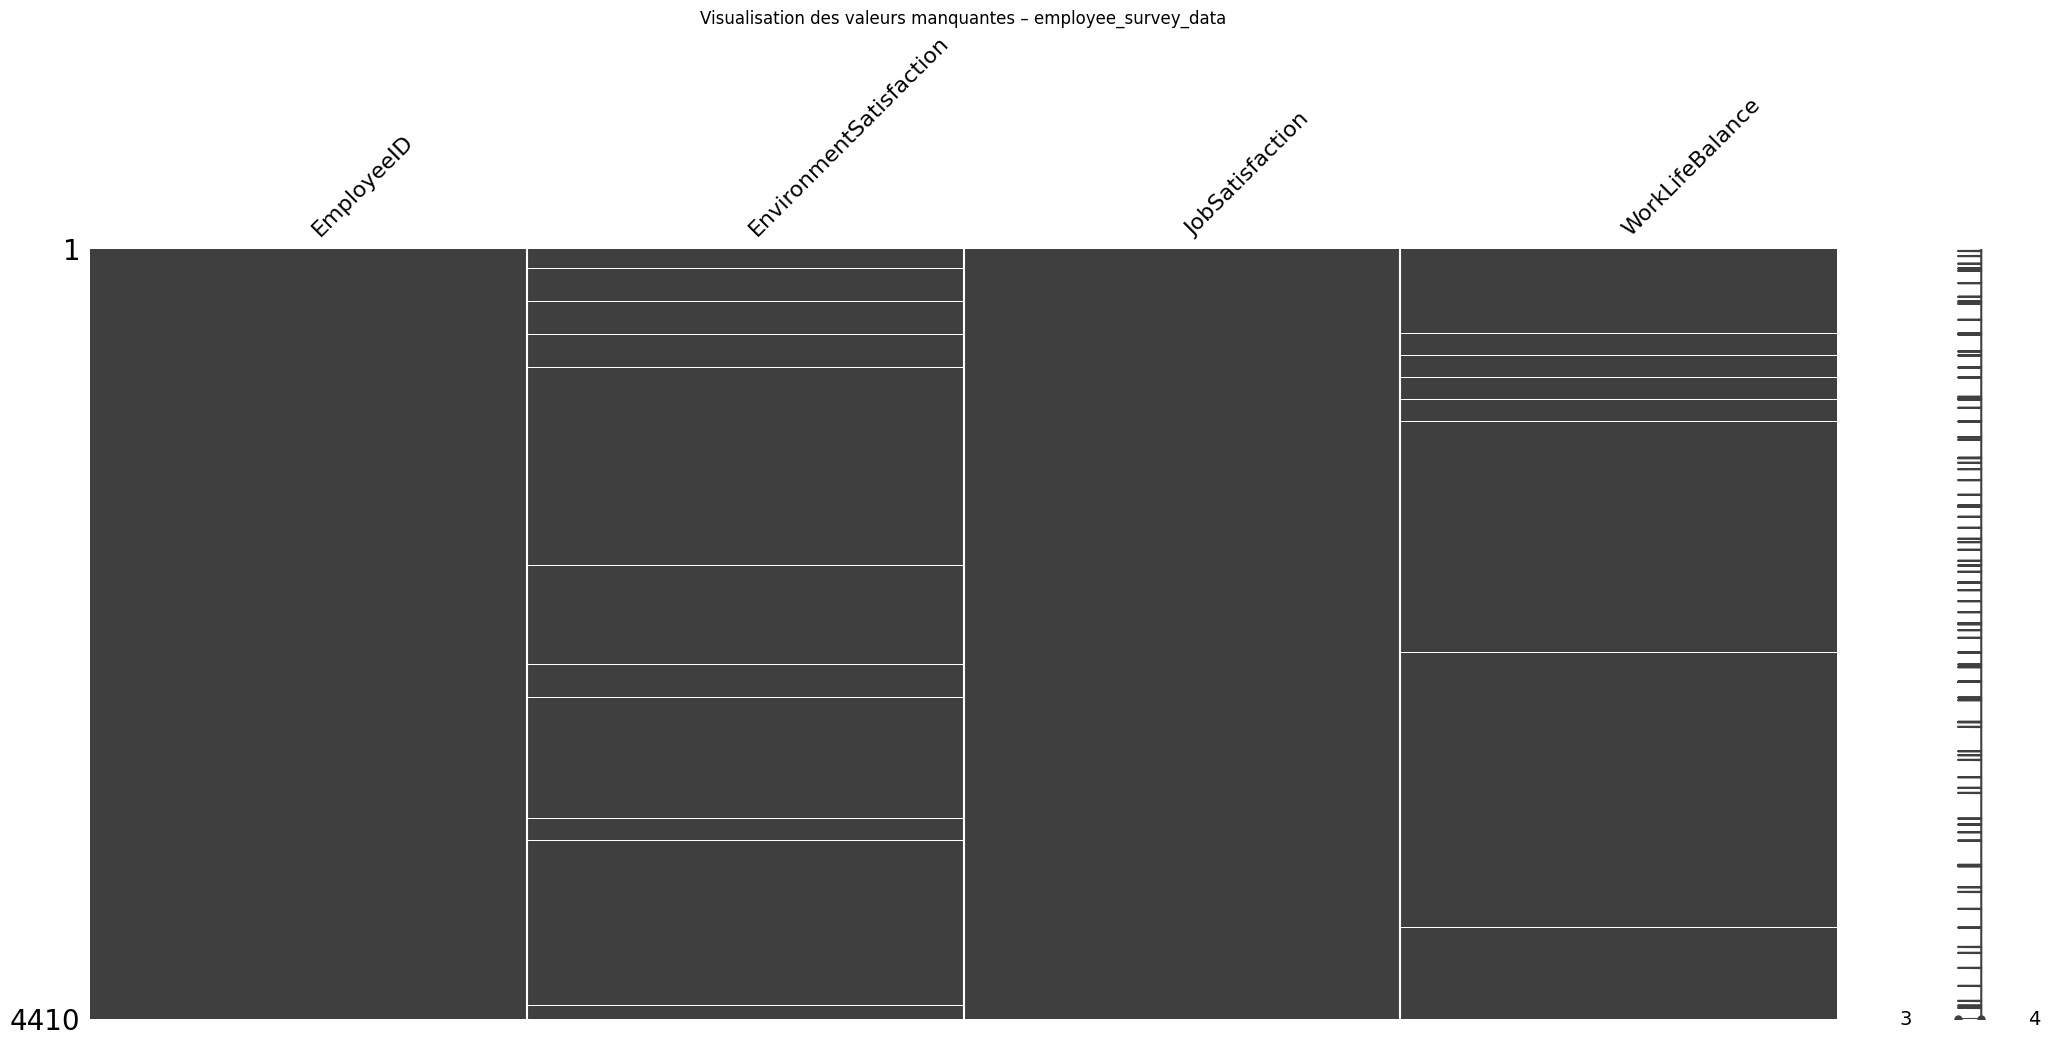

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Conversion explicite des "NA" en NaN si nécessaire
employees.replace("NA", np.nan, inplace=True)

msno.matrix(employees)
plt.title("Visualisation des valeurs manquantes – employee_survey_data")
plt.show()

Missingno ne parvient pas à afficher les valeurs manquantes de Jobsatisfaction mais ces valeurs sont bien présentes et nous verifions cela avec la ligne suivante qui affiche le nombre de valeurs manquantes .

In [7]:
employees["JobSatisfaction"].isnull().sum()

np.int64(20)

barplot des valeurs manquantes 

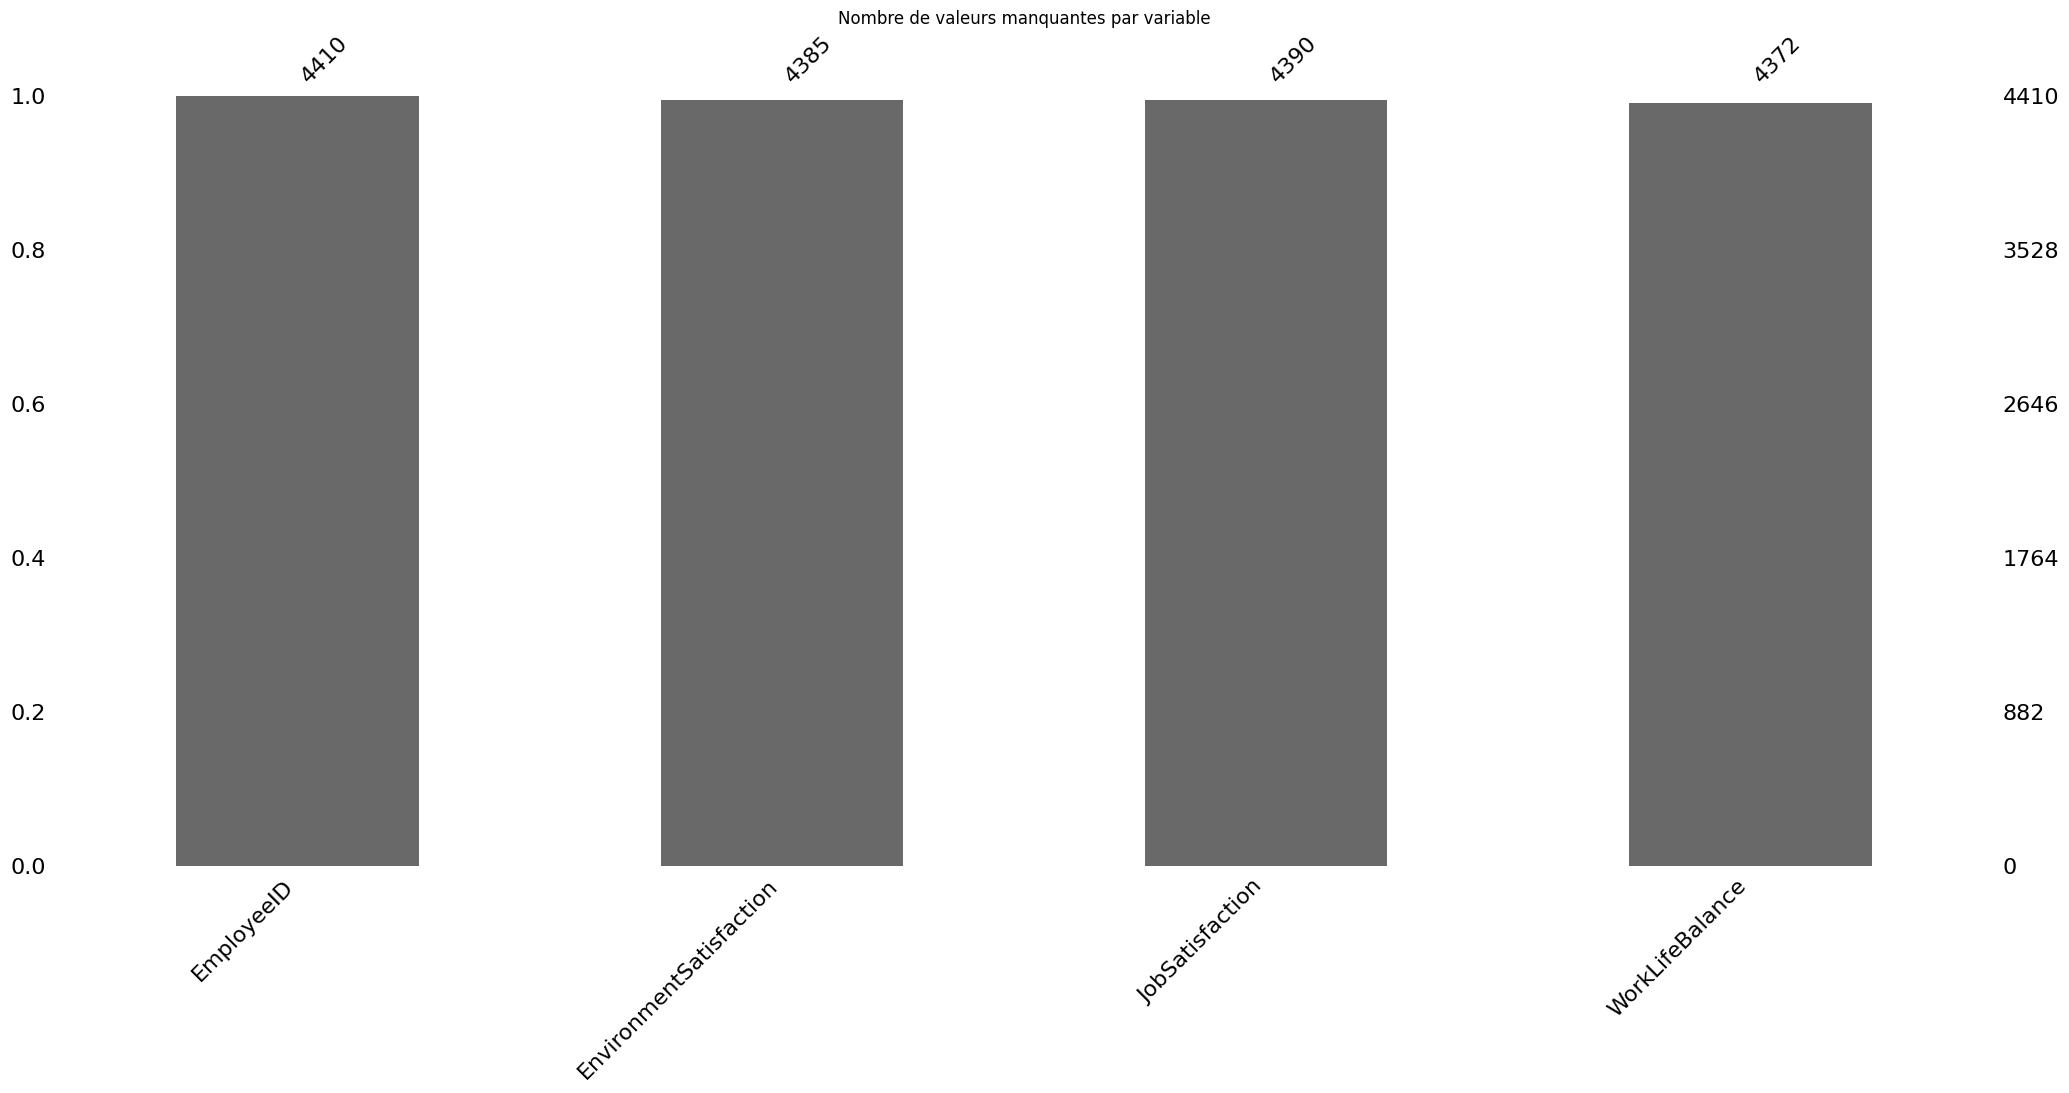

In [8]:
msno.bar(employees)
plt.title("Nombre de valeurs manquantes par variable")
plt.show()

visualisation de la distribution 

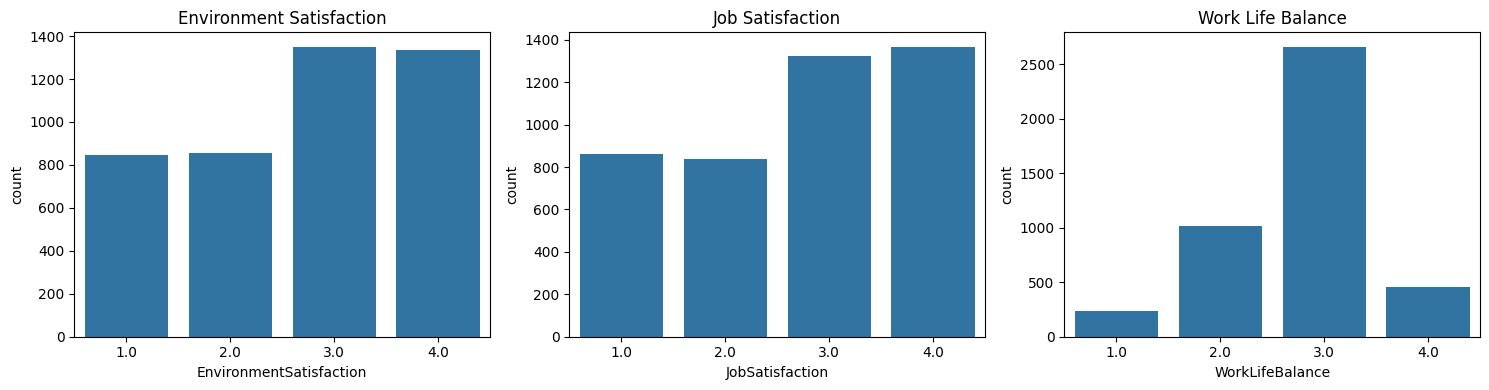

In [9]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

sns.countplot(x="EnvironmentSatisfaction", data=employees, ax=axes[0])
axes[0].set_title("Environment Satisfaction")

sns.countplot(x="JobSatisfaction", data=employees, ax=axes[1])
axes[1].set_title("Job Satisfaction")

sns.countplot(x="WorkLifeBalance", data=employees, ax=axes[2])
axes[2].set_title("Work Life Balance")

plt.tight_layout()
plt.show()

**remplissage des valeurs manquantes**


In [11]:
survey_columns = [
    "EnvironmentSatisfaction",
    "JobSatisfaction",
    "WorkLifeBalance"
]

for col in survey_columns:
    median_value = employees[col].median()
    employees[col].fillna(median_value, inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_29632\714019702.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  employees[col].fillna(median_value, inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_29632\714019702.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, w

verifions si les valeurs manquantes on été remplies

In [13]:
employees.isnull().sum()

EmployeeID                 0
EnvironmentSatisfaction    0
JobSatisfaction            0
WorkLifeBalance            0
dtype: int64

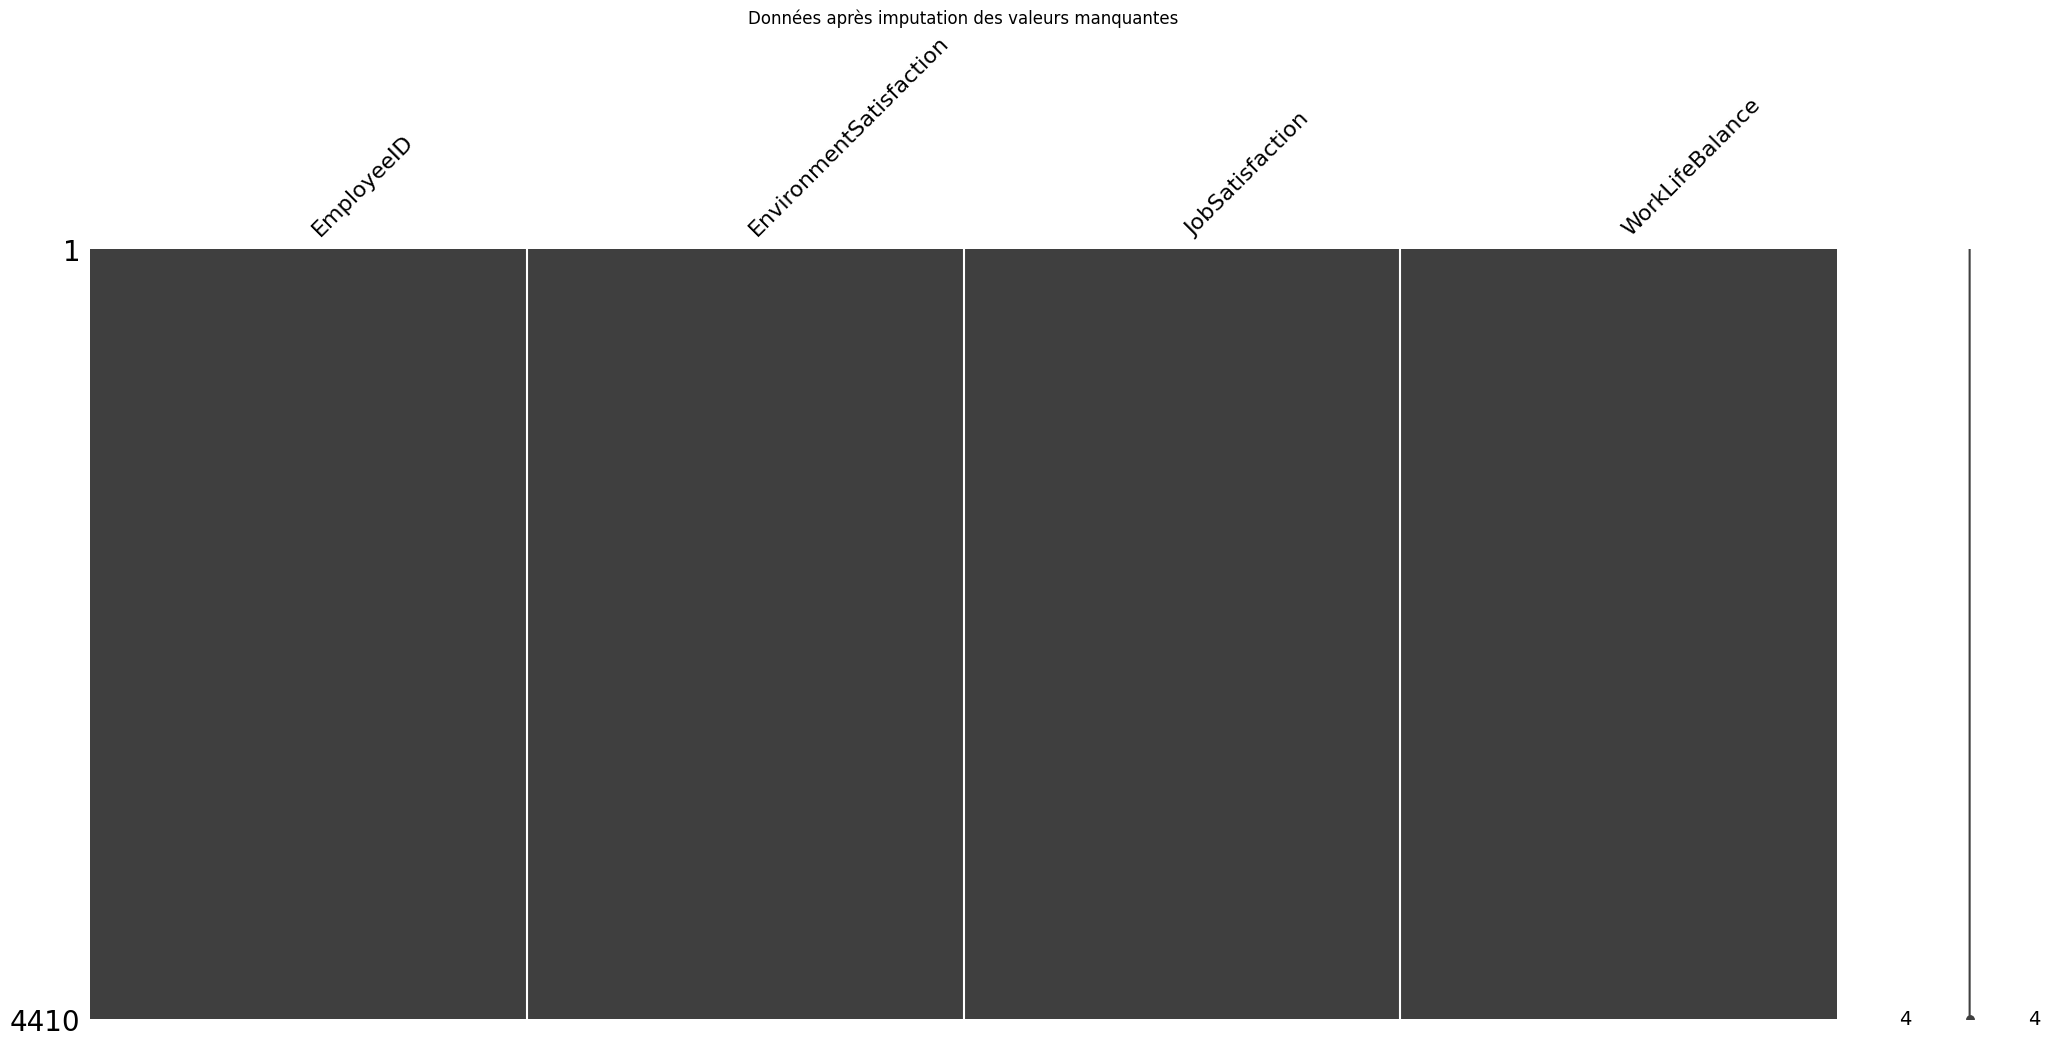

In [14]:
msno.matrix(employees)
plt.title("Données après imputation des valeurs manquantes")
plt.show()

**Sauvegarde du dataset nettoyé**

In [15]:
folder = "Data_cleaned"

os.makedirs(folder, exist_ok=True)

employees.to_csv(f"{folder}/employee_survey_data.csv", index=False)